# In class assignment #3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_subset1 = titanic[['pclass']].copy()
titanic_subset1['count'] = 1
titanic_subset1


,pclass,count
0,3,1
1,1,1
2,3,1
3,1,1
4,3,1
...,...,...
886,2,1
887,1,1
888,3,1
889,1,1


In [6]:
pivot_1 = titanic_subset1.pivot_table(columns='pclass', aggfunc=np.sum)
pivot_1


pclass,1,2,3
count,216,184,491


<AxesSubplot:>

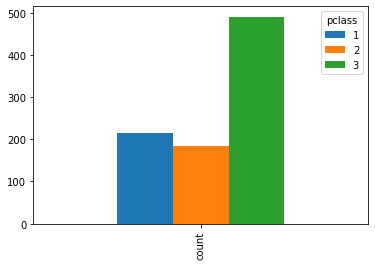

In [7]:
pivot_1.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x319ee2a60>,
 [Text(0.796107424686281, 0.7590869306998885, 'first'),
  Text(-0.6221676201813418, 0.9071424653260843, 'second'),
  Text(-0.175716065426671, -1.0858747001155198, 'third')],
 [Text(0.43424041346524417, 0.41404741674539375, '24.2%'),
  Text(-0.33936415646254997, 0.49480498108695503, '20.7%'),
  Text(-0.09584512659636599, -0.5922952909721017, '55.1%')])

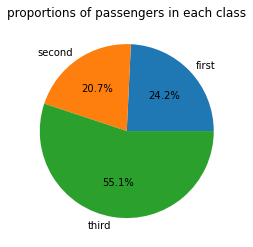

In [8]:
fig = plt.figure()
plt.title('proportions of passengers in each class')
plt.pie(pivot_1.loc['count'], labels=['first', 'second', 'third'], autopct='%1.1f%%')

ValueError: too many values to unpack (expected 2)

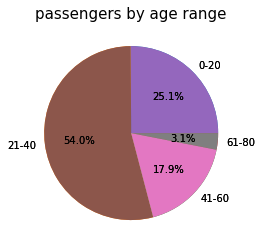

In [9]:
# age ranges using conditionals [0,20,40,60,80]
a = titanic[titanic.age < 21]['age'].count()

b = titanic[(titanic.age > 20) & (titanic.age < 41)]['age'].count()

c = titanic[(titanic.age > 40) & (titanic.age < 61)]['age'].count()

d = titanic[(titanic.age > 60) & (titanic.age < 81)]['age'].count()

labels = ['0-20', '21-40', '41-60', '61-80']
count = [a, b, c, d]

plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('passengers by age range', fontsize=15)
import matplotlib.patches as patches
patches, texts = plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.legend(patches, labels, loc='lower right')
plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'titanic proportion of survivors')

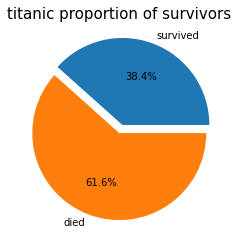

In [ ]:
a = titanic[titanic.survived == 1]['survived'].count()
b = titanic[titanic.survived == 0]['survived'].count()

explode_tuple = (0.1, 0.0)
plt.pie([a, b], labels=['survived', 'died'], autopct='%1.1f%%', explode=explode_tuple)
plt.title('titanic proportion of survivors', fontsize=15)

In [ ]:
surv_class = titanic[['pclass', 'survived']].copy()
surv_class['count'] = 1
surv_class

,pclass,survived,count
0,3,0,1
1,1,1,1
2,3,1,1
3,1,1,1
4,3,0,1
...,...,...,...
886,2,0,1
887,1,1,1
888,3,0,1
889,1,1,1


In [ ]:
surv_class_pv = surv_class.pivot_table(columns='survived', index='pclass', aggfunc=np.sum)
surv_class_pv


count     
survived     0    1
pclass             
1           80  136
2           97   87
3          372  119

<AxesSubplot:title={'center':'titanic survivors by class'}, xlabel='pclass'>

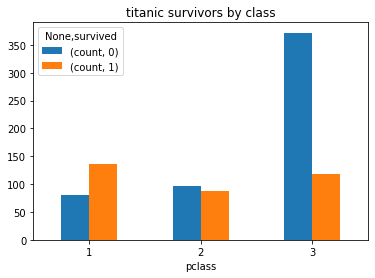

In [ ]:
surv_class_pv.plot(kind='bar', rot=0, title='titanic survivors by class')

In [ ]:
surv_age = titanic[['survived', 'age']].copy()
surv_age['count'] = 1
surv_age

,survived,age,count
0,0,22.0,1
1,1,38.0,1
2,1,26.0,1
3,1,35.0,1
4,0,35.0,1
...,...,...,...
886,0,27.0,1
887,1,19.0,1
888,0,NaN,1
889,1,26.0,1


In [ ]:
surv_age_pv = surv_age.pivot_table(columns='survived', index='age', aggfunc=np.sum)
surv_age_pv

count     
survived     0    1
age                
0.42       NaN  1.0
0.67       NaN  1.0
0.75       NaN  2.0
0.83       NaN  2.0
0.92       NaN  1.0
...        ...  ...
70.00      2.0  NaN
70.50      1.0  NaN
71.00      2.0  NaN
74.00      1.0  NaN
80.00      NaN  1.0

[88 rows x 2 columns]

In [ ]:
surv_age_pv.describe()

count           
survived          0          1
count     77.000000  65.000000
mean       5.506494   4.461538
std        4.967323   3.259970
min        1.000000   1.000000
25%        2.000000   2.000000
50%        3.000000   4.000000
75%        8.000000   6.000000
max       19.000000  15.000000

<AxesSubplot:xlabel='age'>

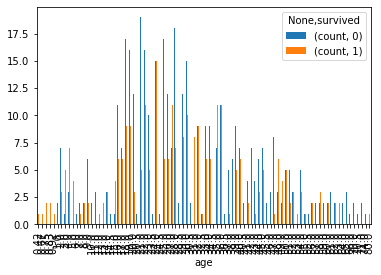

In [ ]:
surv_age_pv.plot(kind='bar')

In [ ]:
surv_age_2 = titanic[['age', 'survived']].copy()
surv_age_2['count'] = 1
surv_age_2

,age,survived,count
0,22.0,0,1
1,38.0,1,1
2,26.0,1,1
3,35.0,1,1
4,35.0,0,1
...,...,...,...
886,27.0,0,1
887,19.0,1,1
888,NaN,0,1
889,26.0,1,1


In [ ]:
#split by age using interval index and cut
age_ranges = pd.IntervalIndex.from_tuples([(0,15),(16,40),(41,66),(67,80)])
surv_age_2['age_range'] = pd.cut(surv_age_2.age, age_ranges)
# drop age column
surv_age_2.drop('age', axis=1, inplace=True)
surv_age_2

,survived,count,age_range
0,0,1,"(16.0, 40.0]"
1,1,1,"(16.0, 40.0]"
2,1,1,"(16.0, 40.0]"
3,1,1,"(16.0, 40.0]"
4,0,1,"(16.0, 40.0]"
...,...,...,...
886,0,1,"(16.0, 40.0]"
887,1,1,"(16.0, 40.0]"
888,0,1,NaN
889,1,1,"(16.0, 40.0]"


In [ ]:
surv_age_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   891 non-null    int64   
 1   count      891 non-null    int64   
 2   age_range  689 non-null    category
dtypes: category(1), int64(2)
memory usage: 15.1 KB


In [ ]:
surv_age_2

In [ ]:
surv_age_2_pv = surv_age_2.pivot_table(columns='survived', index='age_range', aggfunc=np.sum)   
surv_age_2_pv

count     
survived      0    1
age_range           
(0, 15]      34   49
(16, 40]    284  180
(41, 66]     83   52
(67, 80]      6    1

<AxesSubplot:title={'center':'survivors by age range'}, xlabel='age_range'>

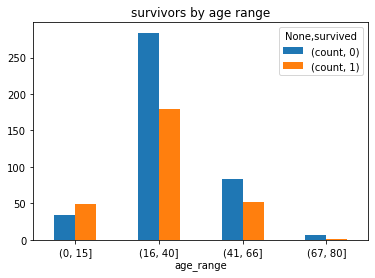

In [ ]:
surv_age_2_pv.plot(kind='bar', title='survivors by age range', rot=0)